# `CLOUD.jl` - Dynamic mode decomposition

In [1]:
using CLOUD
results_path = "../results/advection_dgsem_1D/"
_, spatial_discretization = load_project(results_path);

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/tristanmontoya/.julia/packages/PyPlot/XaELc/src/init.jl:198


Perform the DMD, retaining `n_modes` modes from the SVD and plot the spectrum 

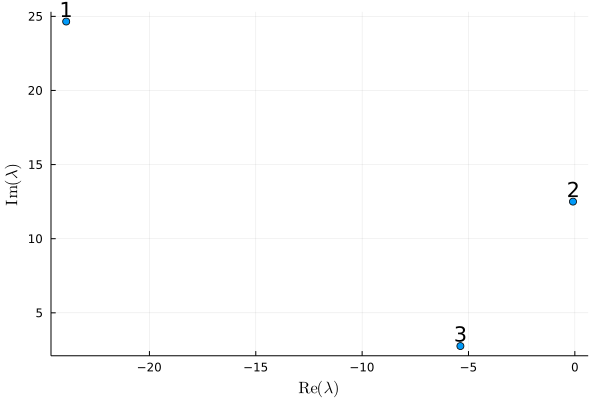

In [2]:
n_modes = 3
dmd = DMDAnalysis(results_path,rank=2*n_modes)
X, Y = load_snapshots(results_path, dmd.time_steps)
σ, λ, ϕ = analyze(dmd, X, Y)
plot_spectrum(dmd, λ[imag(λ) .> 0])

Plot the mode shapes

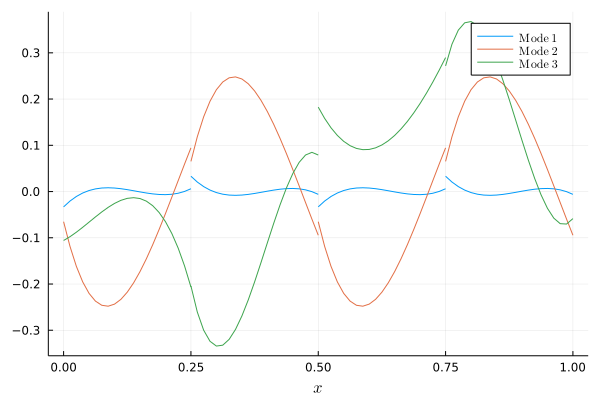

In [3]:
plotter = Plotter(spatial_discretization, dmd.path)
plot_modes(dmd, plotter, real(ϕ[:,imag(λ) .> 0]), 1)